<a href="https://colab.research.google.com/github/deerow22/EscapeEarth/blob/main/Interns/Danielle/FinalResults.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## mount google drive to access files

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
## typical imports
%matplotlib inline
!pip install lightkurve==1.9.0 #b/c non-standard library & we want a specific version
import lightkurve as lk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

     |████████████████████████████████| 501kB 7.6MB/s 
     |████████████████████████████████| 3.9MB 14.5MB/s 
     |████████████████████████████████| 256kB 32.6MB/s 
     |████████████████████████████████| 808kB 23.9MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
     |████████████████████████████████| 3.2MB 35.3MB/s 
  Created wheel for oktopus: filename=oktopus-0.1.2-cp37-none-any.whl size=12780 sha256=8eead97cf767137904a30270b6d20e1bfd07230f74a7db434d6d88928a23265f
  Stored in directory: /root/.cache/pip/wheels/9b/90/81/098fc66ee56166d63c9a8fc0a9672ae7b3423396a588ec952a
  Created wheel for fbpca: filename=fbpca-1.0-cp37-none-any.whl size=11376 sha256=8af8775d4bbb8ede3203738c4bce246279860a142cb9cad1781965b6fb8345d8
  Stored in directory: /root/.cache/pip/wheels/53/a2/dd/9b66cf53dbc58cec1e613d216689e5fa946d3e7805c30f60dc
  Created wheel for pyvo: filename=pyvo-1.1-cp37-none-any.whl size=801573 sha256=ccb4a9061cedcad76a78ba6da80f1030a39b741cde572863222592959223377f
  Store

In [ ]:
## import our custom modules

import sys
sys.path.append('/content/gdrive/My Drive/EscapeEarthData/')
import LCAnalysis_test as lca

In [ ]:
#planet radii calculation fcn

def planet_radii(depth, star_radius):
    import math as m
    R_Sun = 696340000 #m
    R_Earth = 6371000 #m
    r_star = star_radius * R_Sun #b/c in R_Sun units
    radius = r_star * m.sqrt(depth) 
    r_planet = radius / R_Earth #b/c need in R_Earth
    return r_planet

In [ ]:
# candidates with BLS stats
old_candidates = pd.read_csv('/content/gdrive/My Drive/EscapeEarthData/final_candidates_withBLS_stats.csv')
classes_by_eye = pd.read_csv('/content/gdrive/My Drive/EscapeEarthData/Final_candidates_classes.csv')
classes_by_eye #, len(old_candidates), len(old_candidates['TIC'].unique())

,TIC_EB,TIC_planet,TIC_notransitsordata,correct_depth,new_depth,sector_for_correct_depth,author
0,359675849.0,NaN,NaN,NaN,NaN,NaN,danielle
1,26584043.0,NaN,NaN,yes,NaN,NaN,olivia
2,377192675.0,NaN,NaN,yes,NaN,NaN,danielle
3,27843942.0,NaN,NaN,no,NaN,NaN,olivia
4,26656583.0,NaN,NaN,no,NaN,NaN,olivia
...,...,...,...,...,...,...,...
132,272781956.0,NaN,NaN,no,NaN,NaN,olivia
133,273373712.0,NaN,NaN,no,NaN,NaN,olivia
134,NaN,NaN,273566363.0,NaN,NaN,NaN,olivia
135,NaN,NaN,278075650.0,NaN,NaN,NaN,olivia


In [ ]:
final_planets = pd.read_csv('/content/gdrive/My Drive/EscapeEarthData/final_final_candidates.csv')
print(len(final_planets['TIC'].unique()))
final_planets[['TIC','Period','Duration','Transit Time','Power','Depth','Sector']]

8


,TIC,Period,Duration,Transit Time,Power,Depth,Sector
0,28230919,4.887335,0.074,3.860,620,0.002252,14
1,28230919,0.299916,0.298,0.149,0,0.002252,15
2,27915909,10.696316,0.106,8.836,794,0.005749,14
3,27915909,10.696316,0.106,7.277,794,0.005749,15
4,147950620,2.314992,0.074,1.551,454,0.005000,14
5,148914726,1.260755,0.042,0.069,319,0.003000,14
6,148914726,0.301269,0.298,0.158,1,0.003000,15
7,160585813,1.379525,0.106,0.730,339,0.015000,14
8,160585813,1.379525,0.106,0.354,339,0.015000,15
9,190885165,1.651688,0.042,1.593,379,0.065000,15


In [ ]:
PLANET = final_planets['Depth'].to_numpy()
STAR = final_planets['rad'].to_numpy()
count=0
for i,j in zip(PLANET,STAR):
  starr = planet_radii(i, j)
  print(count,': ',starr)
  count+=1
#first tic[0-1]: 4 planets in exofop (2 confirmed, 2candidates) - all around 4 radii - we confirmed the first confirmed planet with sec 14 - same p, ~same r
#second tic[2-3]: 1 planet in exofop - we have same period but they get 68 radii
#third tic[4]: 1 planet in exofop - we get ~same radii, period
#fourth tic [5-6']: 1planet in exofop - we get same r,p in sec 14
#fifth tic [7-8]: no planet in exofop
#sixth tic[9]: no planet in exofop
#seventh tic[10-11]: no planet in exofop
#eight tic[12-13]: 1 planet in exofop - we get same r,p in sec 14

0 :  3.941196470377472
1 :  3.941196470377472
2 :  15.380204998085247
3 :  15.380204998085247
4 :  7.671920163604027
5 :  4.640288569308578
6 :  4.640288569308578
7 :  24.49860230894217
8 :  24.49860230894217
9 :  12.442884176832129
10 :  11.763675696123057
11 :  11.763675696123057
12 :  7.531152120758127
13 :  7.531152120758127


(1687.0, 1687.5)

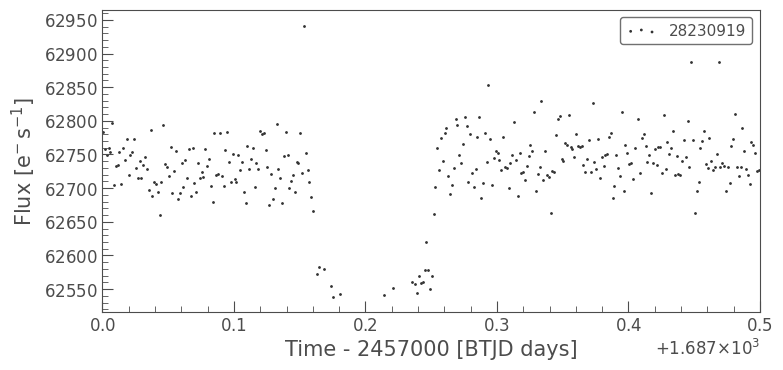

In [ ]:
sector = 14
tic = 28230919
%matplotlib inline
lcf = lk.open('/content/gdrive/My Drive/EscapeEarthData/Sec{}_cleaned/{}/lc.fits'.format(sector,tic))
lc = lcf.FLUX
lc.scatter()
plt.xlim(1687,1687.5)

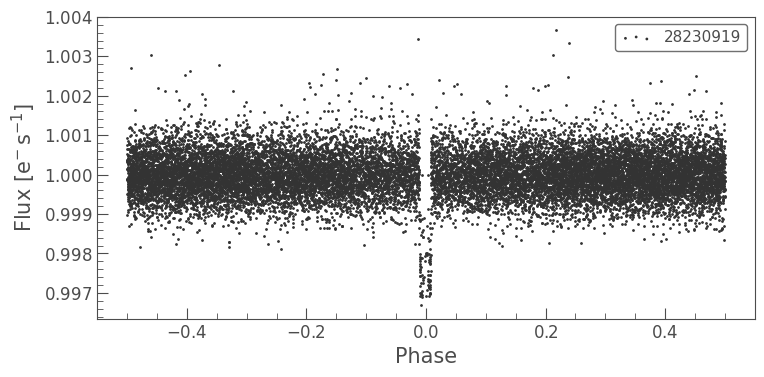

In [ ]:
%matplotlib inline

flat = lc.flatten()
folded = flat.fold(4.887335, t0=1687.215 )#(1693.6-4.887335)) 1687.159
folded.scatter()


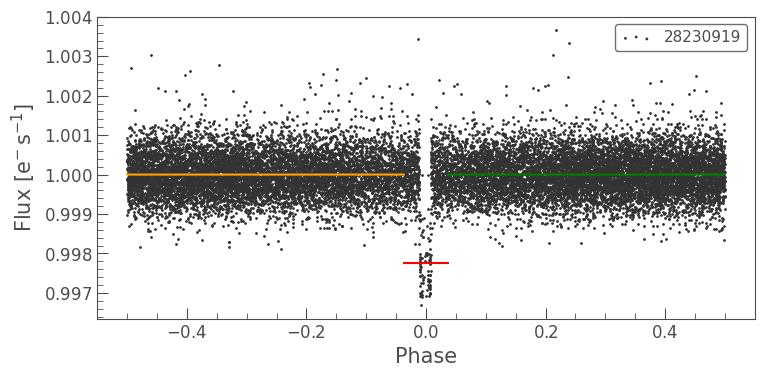

In [ ]:
depth = 0.002252
duration = 0.074
ttime = 3.860
period = 4.887335

xstart = np.arange(min(folded.time),-duration/2,.0001)
ystart = np.repeat(1,len(xstart))
# dip = np.linspace(-duration, duration, .001)
xdip = np.arange(-duration/2, duration/2,.0001)
ydip = np.repeat(1-depth,len(xdip))
xend = np.arange(duration/2,max(folded.time),.0001)
yend = np.repeat(1,len(xend))

folded.scatter(zorder=0)
plt.plot(xstart,ystart,zorder=10,color='orange')
plt.plot(xdip,ydip,color='r')
plt.plot(xend,yend,color='g')


(1686.7, 1687.7)

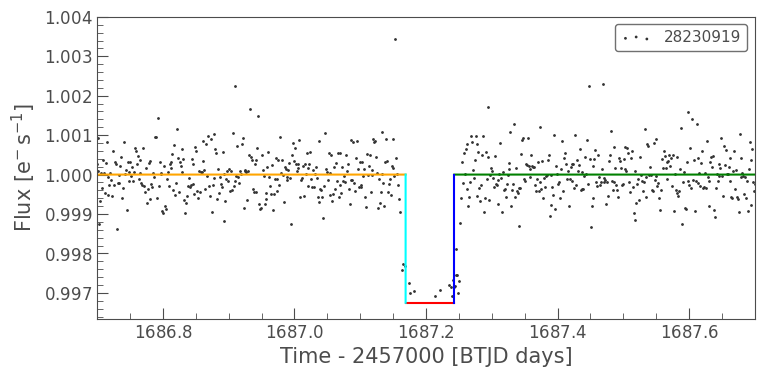

In [ ]:
ttime = 3.85

xstart= np.arange(1686.7, lc.time.min()+ttime-(duration/2), .0001)
ystart = np.repeat(1,len(xstart))
xdip = np.arange(lc.time.min() + ttime - (duration/2), lc.time.min() + ttime+(duration/2), .0001)
ydip = np.repeat(.999-depth, len(xdip))
xend = np.arange(xdip.max(), 1687.7, .0001)
yend = np.repeat(1,len(xend))
tran1x = np.linspace(xstart.max(), xdip.min(),10)
tran2x = np.linspace(xdip.max(), xend.min(),10)
tran1y = np.linspace(1, ydip.min(),10)
tran2y = np.linspace(ydip.max(), 1,10)

flat.scatter()
plt.plot(xstart,ystart, color='orange')
plt.plot(xdip,ydip,color='r')
plt.plot(xend,yend,color='g')
plt.plot(tran1x,tran1y,color='cyan')
plt.plot(tran2x,tran2y,color='b')
plt.xlim(1686.7,1687.7)


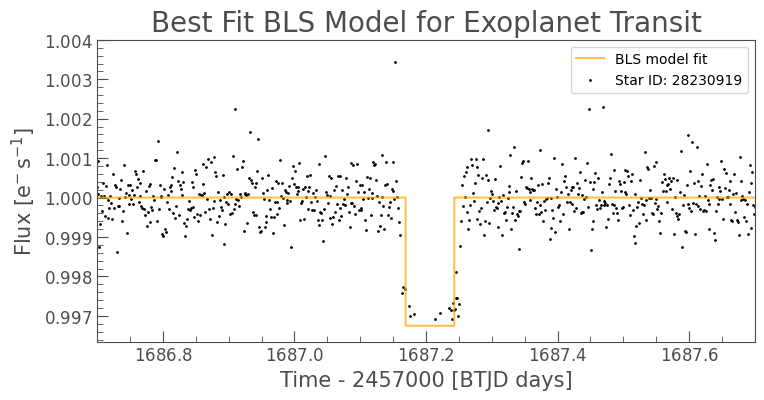

In [ ]:
ttime = 3.85

xstart= np.arange(1686.7, lc.time.min()+ttime-(duration/2), .0001)
ystart = np.repeat(1,len(xstart))
xdip = np.arange(lc.time.min() + ttime - (duration/2), lc.time.min() + ttime+(duration/2), .0001)
ydip = np.repeat(.999-depth, len(xdip))
xend = np.arange(xdip.max(), 1687.7, .0001)
yend = np.repeat(1,len(xend))
tran1x = np.linspace(xstart.max(), xdip.min(),10)
tran2x = np.linspace(xdip.max(), xend.min(),10)
tran1y = np.linspace(1, ydip.min(),10)
tran2y = np.linspace(ydip.max(), 1,10)

x = np.concatenate([xstart, tran1x, xdip, tran2x, xend])
y = np.concatenate([ystart, tran1y, ydip, tran2y, yend])
# print(len(x), len(xstart))
flat.scatter(color='k',label = 'Star ID: ' +str(tic))
plt.plot(x,y,color='orange', label='BLS model fit',alpha=.7)
# plt.plot(xstart,ystart, color='orange')
# plt.plot(xdip,ydip,color='r')
# plt.plot(xend,yend,color='g')
# plt.plot(tran1x,tran1y,color='cyan')
# plt.plot(tran2x,tran2y,color='b')
plt.xlim(1686.7,1687.7);
plt.title('Best Fit BLS Model for Exoplanet Transit',fontsize=20)
plt.legend();
#save for final website---already ran
# plt.savefig('/content/gdrive/My Drive/EscapeEarthData/transit_w_BLSmodel.png',dpi=200)

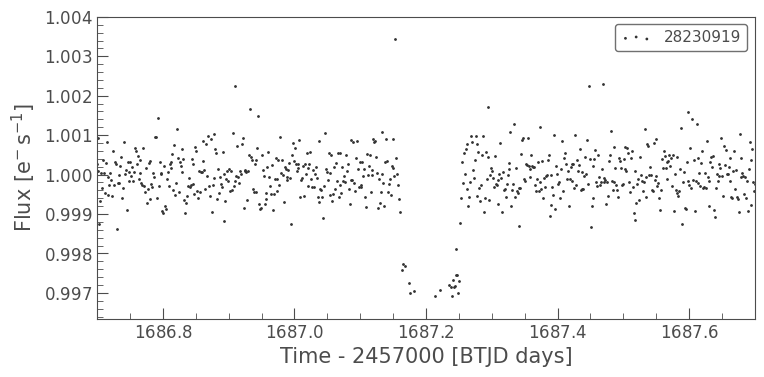

In [ ]:
flat.scatter()
plt.xlim(1686.7,1687.7);


In [ ]:
# OLD BELOW

In [ ]:
#remove EBs/nodata/notransits & keep planets
mask = []
for count,i in enumerate(classes_by_eye['TIC_planet'].to_numpy()):
  if np.isnan(i)==True:
    pass
  else:
    mask.append(count)
final_stars = classes_by_eye.iloc[mask]
print(len(final_stars),len(mask))

26 26


In [ ]:
#see which stars are missing from out classes by eye vs old_candidates

old = old_candidates['TIC'].to_numpy()
missing = []
count = 0
for i,j,k in zip(classes_by_eye['TIC_EB'].to_numpy(),classes_by_eye['TIC_notransitsordata'].to_numpy(),classes_by_eye['TIC_planet'].to_numpy()):
  older = old[count]
  if np.isin(i,old)==True:
    pass
  elif np.isin(j,old)==True:
    pass
  elif np.isin(k,old)==True:
    pass
  else:
    if np.isnan(i)==True:
      pass
    else:
      missing.append(i)
    if np.isnan(j)==True:
      pass
    else:
      missing.append(j)
    if np.isnan(k)==True:
      pass
    else:
      missing.append(k)
  count +=1
missing #but this tic had no data

[56103261.0]

In [ ]:
#sanity check of above

def returnNotMatches(a, b):
    '''
    inputs: a,b
            both lists or arrays
    outputs: not in b, not in a
            two lists
    '''
    return [[x for x in a if x not in b], [x for x in b if x not in a]] #not in b , not in a



missings = []
not_in_eb, not_in_old = returnNotMatches(classes_by_eye['TIC_EB'].to_numpy(), old)
missings.append(not_in_eb)
not_in_no, not_in_old2 = returnNotMatches(classes_by_eye['TIC_notransitsordata'].to_numpy(),old)
missings.append(not_in_no)
not_in_planets,not_in_old3 = returnNotMatches(classes_by_eye['TIC_planet'].to_numpy(),old)
missings.append(not_in_planets)
# missings---all nans except: 56103261.0
# not_in_missings,not_in_old4 = returnNotMatches(missings,old)
# not_in_missings

In [ ]:
#radii for final planet-host-candidates

mydf = final_stars[['TIC_planet','correct_depth','new_depth','sector_for_correct_depth','author']]
mydf

,TIC_planet,correct_depth,new_depth,sector_for_correct_depth,author
5,199716496.0,no,NaN,NaN,sarah
7,356632361.0,no,0.0100,NaN,danielle
8,160585813.0,no,0.0150,NaN,a-c
11,27915909.0,yes,NaN,15.0,olivia
12,147950620.0,no,NaN,NaN,Maria
16,28230919.0,yes,NaN,14.0,olivia
17,41998476.0,no,NaN,NaN,olivia
20,148914726.0,no,NaN,NaN,Maria
29,170344769.0,no,0.0625,NaN,a-c
32,185060842.0,no,0.0300,NaN,a-c


In [ ]:
#merge with old stats

mydic = {199716496:'eb',41998476:'eb', 170344769:'eb', 185060842:'eb', 155894704:'eb', 198388252:'eb', 198408416:'eb',
         199682037:'binary', 85711393:'eb', 99813351:'eb',47762157:'eb', 115481900:'eb',229910746:'eb', 268289462:'eb', 394179202:'eb', 271548206:'eb', 279918206:'eb' }
# sec15=[356632361,190885165, 229910746, 268289462,394179202,416195870,271548206, 279918206]
new_depths ={ 28230919:0.002252,27915909: 0.005749 ,
             147950620: .005,148914726:.003,
             160585813: .015 ,190885165:.065,
               356632361: .01, 
              416195870:.005 }
depthsnew = [0.002252, 0.002252, 0.005749, 0.005749,.005, .003, .003, .015, .015, .065, .01,.01,.005, .005]
indices = [8,9,6,7,45,46,47, 66,67,80, 189, 190,208,209 ]  #[8, 11, 12, 16, 20, 7, 36, 75]

In [ ]:
#select planet rows
final = old_candidates.iloc[indices]
#replace depths
final['Depth'] = depthsnew
final 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,ID,version,HIP,TYC,UCAC,TWOMASS,SDSS,ALLWISE,GAIA,APASS,KIC,objType,typeSrc,ra,dec,POSflag,pmRA,e_pmRA,pmDEC,e_pmDEC,PMflag,plx,e_plx,PARflag,gallong,gallat,eclong,eclat,Bmag,e_Bmag,Vmag,e_Vmag,umag,e_umag,gmag,e_gmag,rmag,e_rmag,imag,e_imag,...,eneg_Rad,epos_Rad,eneg_rho,epos_rho,eneg_logg,epos_logg,eneg_lum,epos_lum,eneg_dist,epos_dist,distflag,eneg_Teff,epos_Teff,TeffFlag,gaiabp,e_gaiabp,gaiarp,e_gaiarp,gaiaqflag,starchareFlag,VmagFlag,BmagFlag,splists,e_RA,e_Dec,RA_orig,Dec_orig,e_RA_orig,e_Dec_orig,raddflag,wdflag,objID,ABS Mag,TIC,Period,Duration,Transit Time,Power,Depth,Sector
8,28230919,20190415,97657.0,3561-02092-1,691-070316,19505021+4804508,NaN,NaN,2086512227851023872,54470133.0,10748390.0,STAR,tmgaia2,297.709364,48.080860,tmgaia2,125.98400,0.040610,232.98800,0.044990,gaia2,26.45080,0.023446,gaia2,81.833703,10.772381,321.548036,66.629442,10.556,0.141,9.460,0.030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.051426,0.045157,0.418599,0.455017,0.080525,0.092496,0.009814,0.008251,0.0336,0.0337,bj2018,107.360,118.3730,spect,9.74374,0.001652,8.46507,0.001891,1,NaN,hipvmag,apassdr9,NaN,0.689515,0.697757,297.710176,48.081864,0.019271,0.024141,1,0,347873767,6.263174,28230919,4.887335,0.074,3.860,620,0.002252,14
9,28230919,20190415,97657.0,3561-02092-1,691-070316,19505021+4804508,NaN,NaN,2086512227851023872,54470133.0,10748390.0,STAR,tmgaia2,297.709364,48.080860,tmgaia2,125.98400,0.040610,232.98800,0.044990,gaia2,26.45080,0.023446,gaia2,81.833703,10.772381,321.548036,66.629442,10.556,0.141,9.460,0.030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.051426,0.045157,0.418599,0.455017,0.080525,0.092496,0.009814,0.008251,0.0336,0.0337,bj2018,107.360,118.3730,spect,9.74374,0.001652,8.46507,0.001891,1,NaN,hipvmag,apassdr9,NaN,0.689515,0.697757,297.710176,48.081864,0.019271,0.024141,1,0,347873767,6.263174,28230919,0.299916,0.298,0.149,0,0.002252,15
6,27915909,20190415,NaN,3561-00922-1,693-071357,19471820+4826361,NaN,J194718.22+482636.1,2086643104093265792,54466249.0,10987439.0,STAR,tmgaia2,296.825880,48.443339,tmgaia2,12.23340,0.059813,4.96015,0.060169,gaia2,2.67200,0.031236,gaia2,81.871846,11.462243,320.649452,67.223843,11.314,0.109,10.689,0.007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.089318,0.128627,0.052318,0.057282,0.097923,0.104853,0.323779,0.293419,4.2670,4.3660,bj2018,175.361,148.1350,spect,11.02350,0.000878,10.33890,0.000641,1,NaN,tycho2v3,tycho2b3,NaN,1.016970,0.933177,296.825959,48.443360,0.027646,0.032123,1,0,338972385,2.882082,27915909,10.696316,0.106,8.836,794,0.005749,14
7,27915909,20190415,NaN,3561-00922-1,693-071357,19471820+4826361,NaN,J194718.22+482636.1,2086643104093265792,54466249.0,10987439.0,STAR,tmgaia2,296.825880,48.443339,tmgaia2,12.23340,0.059813,4.96015,0.060169,gaia2,2.67200,0.031236,gaia2,81.871846,11.462243,320.649452,67.223843,11.314,0.109,10.689,0.007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.089318,0.128627,0.052318,0.057282,0.097923,0.104853,0.323779,0.293419,4.2670,4.3660,bj2018,175.361,148.1350,spect,11.02350,0.000878,10.33890,0.000641,1,NaN,tycho2v3,tycho2b3,NaN,1.016970,0.933177,296.825959,48.443360,0.027646,0.032123,1,0,338972385,2.882082,27915909,10.696316,0.106,7.277,794,0.005749,15
45,147950620,20190415,NaN,4385-00509-1,800-020583,11111689+6957527,NaN,J111117.07+695753.0,1074139748425931008,59749525.0,NaN,STAR,tmgaia2,167.820482,69.964708,tmgaia2,79.48610,0.044630,15.42790,0.044499,gaia2,6.65269,0.028894,gaia2,134.723430,44.800633,127.273801,56.429544,11.818,0.145,11.302,0.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.038358,0.073240,0.207177,0.251468,0.076626,0.094575,0.015542,0.021492,0.6490,0.6550,bj2018,156.062,92.9382,dered,11.41740,0.001835,10.43290,0.000882,1,NaN,tycho2v3,tycho2b3,NaN,0.844670,0.690160,167.821481,69.964775,0.024943,0.024441,1,0,142679053,5.103686,147950620,2.314992,0.074,1.551,454,0.005000,14
46,148914726,20190415,NaN,4161-00688-1,787-021690,12281343+6714239,1.237651e+18,J122813.41+671423.9,1680911012650126848,59593798.0,NaN,STAR,tmgaia2,187.055970,67.239983,tmgaia2,-6.57786,0.041855,13.82290,0

In [ ]:
#save to file---already ran
# final.to_csv('/content/gdrive/My Drive/EscapeEarthData/final_final_candidates.csv',index=False)